<a href="https://colab.research.google.com/github/yl540016/PortfolioProjects/blob/main/NYTimesDataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df_nyt = pd.read_csv('./nyt_2022_9.csv')

In [4]:
# Check the number of rows and columns
  # row - records
  # column - variables
df_nyt.shape

(3766, 1373)

In [5]:
# Print the list of columns
df_nyt.columns

Index(['abstract', 'source', 'web_url', 'lead_paragraph', 'pub_date',
       'news_desk', 'section_name', 'word_count', 'uri', 'authors',
       ...
       'kw-Eurozone', 'kw-Centers for Medicare and Medicaid Services',
       'kw-Bushwick (Brooklyn, NY)', 'kw-Midwestern States (US)',
       'kw-Capitalism (Theory and Philosophy)',
       'kw-Port Authority of New York and New Jersey', 'kw-WhatsApp Inc',
       'kw-Federal Emergency Management Agency', 'kw-Geology',
       'kw-United States Air Force'],
      dtype='object', length=1373)

In [7]:
df_nyt.head(2)

,abstract,source,web_url,lead_paragraph,pub_date,news_desk,section_name,word_count,uri,authors,...,kw-Eurozone,kw-Centers for Medicare and Medicaid Services,"kw-Bushwick (Brooklyn, NY)",kw-Midwestern States (US),kw-Capitalism (Theory and Philosophy),kw-Port Authority of New York and New Jersey,kw-WhatsApp Inc,kw-Federal Emergency Management Agency,kw-Geology,kw-United States Air Force
0,Have we simply become inured to police shootin...,The New York Times,https://www.nytimes.com/2022/08/31/opinion/def...,Some said it was dumb.,2022-09-01T00:09:05+0000,OpEd,Opinion,863,nyt://article/9bcc81a7-7555-50b3-af1c-0743bd82...,Charles,...,0,0,0,0,0,0,0,0,0,0
1,Ms. Peltola notched a major upset against Ms. ...,The New York Times,https://www.nytimes.com/2022/08/31/us/politics...,In an upset with the potential to reverberate ...,2022-09-01T00:15:51+0000,Politics,U.S.,1163,nyt://article/ee36e5da-abd1-5596-a53e-e33f0648...,Blake Hounshell,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# check the missing proportion of the data
missing_prop = (df_nyt.isna().sum(axis=1) != 0).mean()
missing_prop

0.12719065321295805

In [9]:
# remove data with missing components
df_complete = df_nyt.dropna().reset_index()
# and store new dataframe that doesn't include any missing data
df_complete.shape

(3287, 1374)

In [10]:
# check duplicated records
df_complete.duplicated().sum()

0

In [15]:
# check if there's a column st every value in the column is equal
unique_column_list=[]
for col in df_complete.columns:
  if len(df_complete[col].unique()) == 1:
    unique_column_list.append(col)

print(f'List of columns with unique value: \n{unique_column_list}')
print(f'Number of unique columns: {len(unique_column_list)}')

List of columns with unique value: 
['source', 'kw-Republican National Committee', 'kw-Pfizer Inc', 'kw-Chronic Traumatic Encephalopathy', 'kw-Jury System', 'kw-Mosques', 'kw-United States Coast Guard', 'kw-Boats and Boating', 'kw-Modern Love (Times Column)', 'kw-Israeli Settlements', 'kw-Evictions', 'kw-Jerusalem (Israel)', 'kw-Romania', 'kw-Boeing Company', 'kw-Pence, Mike', 'kw-Public Theater', 'kw-New York Knicks', 'kw-Poisoning and Poisons', 'kw-Cruz, Ted', 'kw-Engineering and Engineers', 'kw-Pittsburgh (Pa)', 'kw-Hermes International SA', 'kw-Warren, Elizabeth', 'kw-Plastics', 'kw-Recycling of Waste Materials', 'kw-Maduro, Nicolas', 'kw-Perfumes and Fragrances', 'kw-Woods, Tiger', 'kw-Civil War (US) (1861-65)', 'kw-SoHo (Manhattan, NY)', 'kw-Eggs', 'kw-Baby Boomers', 'kw-Veganism', 'kw-Cattle', 'kw-Cosmetics and Toiletries', 'kw-East Village (Manhattan, NY)', 'kw-Pain-Relieving Drugs', 'kw-Collectors and Collections', 'kw-Explosions (Accidental)', 'kw-Nigeria', 'kw-Bombs and Expl

In [16]:
# Create a list that includes every keyword-column 
keyword_column_list=[col for col in df_complete.columns if col.startswith('kw-')]

# Print the total num of keyword-columns
print('The number of keywords: ', len(keyword_column_list))

The number of keywords:  1363


In [17]:
# If the number of keyword-columns is greater than 1300, then create a new data frame
# From df, remove every column in df except for ['abstract','pub_date', 'news_desk','word_count','authors']

if len(keyword_column_list) > 1300:
  df_nyt_without_kw=df_complete.loc[:,['abstract','pub_date','news_desk','word_count','authors']]
else:
  df_nyt_without_kw=df_complete
df_nyt_without_kw.head()

,abstract,pub_date,news_desk,word_count,authors
0,Have we simply become inured to police shootin...,2022-09-01T00:09:05+0000,OpEd,863,Charles
1,Ms. Peltola notched a major upset against Ms. ...,2022-09-01T00:15:51+0000,Politics,1163,Blake Hounshell
2,Mr. Gorbachev was charming and presented himse...,2022-09-01T00:23:50+0000,Washington,1354,Peter Baker
3,Limits were placed on high-end GPUs that power...,2022-09-01T01:14:31+0000,Business,814,Don Clark;Ana Swanson
4,If two nights earlier was about posterity and ...,2022-09-01T01:45:29+0000,Sports,1200,Matthew Futterman


In [18]:
# Change 'pub_date' col data type to pandas datetime 
df_nyt_without_kw['pub_date'] = pd.to_datetime(df_nyt_without_kw['pub_date'])

# Remove every record that is written before 2022-09-21 and store its output
df_nyt_without_kw_2022_september=df_nyt_without_kw[df_nyt_without_kw['pub_date'] >= "2022-09-21"].reset_index(drop=True)
df_nyt_without_kw_2022_september.shape

(980, 5)

In [19]:
# Create a new column by taking only the first author
df_nyt_without_kw_2022_september['first_author']=df_nyt_without_kw_2022_september['authors'].apply(lambda x: x.split(';')[0])
df_nyt_without_kw_2022_september=df_nyt_without_kw_2022_september.drop('authors', axis=1)
df_nyt_without_kw_2022_september.head()

,abstract,pub_date,news_desk,word_count,first_author
0,"Organizations and officials in New York, a cit...",2022-09-21 00:05:52+00:00,Metro,568,Hurubie Meko
1,Spending by European companies on new factorie...,2022-09-21 00:40:06+00:00,Business,655,Keith Bradsher
2,An underground oil tank makes a mysterious art...,2022-09-21 01:00:05+00:00,Culture,688,Jori Finkel
3,Win big with Matthew Stock’s Wednesday puzzle.,2022-09-21 02:00:05+00:00,Games,990,Rachel Fabi
4,But first it would help to admit that the bord...,2022-09-21 02:01:05+00:00,OpEd,885,Bret Stephens


#### **DATA ANALYSIS**

Which `news_desk` has the most articles?

In [20]:
df_nyt_without_kw_2022_september['news_desk'].value_counts().index[0]

'Foreign'

Who wrote the most articles as the `first_author`?

In [21]:
most_article_author=df_nyt_without_kw_2022_september['first_author'].value_counts().index[0]
most_article_author

'Josh Katz'

Who has written the most diverse range of articles in terms of different news desk categories? 

In [22]:
df_groupby=df_nyt_without_kw_2022_september.groupby(['first_author'])

df_groupby_diverse=df_groupby.apply(lambda sub_df: len(sub_df['news_desk'].value_counts()))

print('The most diverse writer is: ', df_groupby_diverse.index[df_groupby_diverse.argmax()])

The most diverse writer is:  Cade Metz


Who has highest average word count per article?

In [23]:
df_groupby_word_mean=df_groupby.apply(lambda row: row['word_count'].mean())
df_groupby_word_mean.index[df_groupby_word_mean.argmax()]

'Nicholas Casey'

#### **VISUALIZATION** - Box Plot


In [24]:
df_nyt_without_kw_2022_september['dayofweek']=df_nyt_without_kw_2022_september['pub_date'].apply(lambda x: x.dayofweek)
boxplot_list=[]
for int_day in range(7):
  boxplot_list.append(df_nyt_without_kw_2022_september['word_count'][df_nyt_without_kw_2022_september['dayofweek']==int_day])


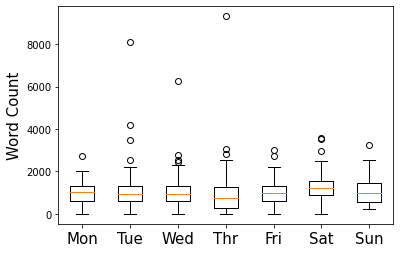

In [25]:
from  matplotlib import pyplot as plt
plt.boxplot(boxplot_list)
plt.xticks([i for i in range(1,8,1)], 
           ['Mon','Tue','Wed','Thr','Fri','Sat','Sun'], fontsize=15)
plt.ylabel('Word Count', fontsize=15)
plt.show()